## Clustering using K-Means

#### The Dataset 

The dataset used is a subset of a dataset that was used for a Machine Learning competition hosted by FORCE 2020 and XEEK for the prediction of lithology from well logging measurements.

Data was provided by the FORCE Machine Learning competition with well logs and seismic 2020 Bormann P., Aursand P., Dilib F., Dischington P., Manral S. 2020. 2020 FORCE Machine Learning Contest. https://github.com/bolgebrygg/Force-2020-Machine-Learning-competition

I'm using the k-means algorythym to cluster data.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [14]:
df = pd.read_csv('force2020_data.csv' , index_col = 'DEPTH_MD')

df.dropna(inplace=True)

df.describe()

,RHOB,GR,NPHI,PEF,DTC
count,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000
mean,2.149947,61.253852,0.414572,3.912313,121.409905
std,0.251592,29.902708,0.139207,1.816933,30.394369
min,1.493417,6.191506,0.037976,1.126667,55.726753
25%,1.983767,42.792794,0.313797,2.629141,89.977041
50%,2.059335,62.886322,0.466891,3.365132,138.477173
75%,2.389839,77.726776,0.513840,4.686422,146.242302
max,2.889454,499.022583,0.800262,17.026619,163.910797


In [19]:
# TRANSFORMING OUR DATA

scaler = StandardScaler()

df[['RHOB_T', 'NPHI_T', 'GR_T', 'PEF_T', 'DTC_T']] = scaler.fit_transform(df[['RHOB', 'NPHI', 'GR', 'PEF', 'DTC']])

df.describe()

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,NPHI_T,GR_T,PEF_T,DTC_T
count,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000,1.220200e+04,1.220200e+04,1.220200e+04,1.220200e+04,1.220200e+04
mean,2.149947,61.253852,0.414572,3.912313,121.409905,-5.217557e-16,-1.490731e-16,7.453653e-17,2.236096e-16,-6.708287e-16
std,0.251592,29.902708,0.139207,1.816933,30.394369,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,1.493417,6.191506,0.037976,1.126667,55.726753,-2.609607e+00,-2.705419e+00,-1.841459e+00,-1.533222e+00,-2.161119e+00
25%,1.983767,42.792794,0.313797,2.629141,89.977041,-6.605409e-01,-7.239543e-01,-6.173961e-01,-7.062589e-01,-1.034210e+00
50%,2.059335,62.886322,0.466891,3.365132,138.477173,-3.601669e-01,3.758510e-01,5.459496e-02,-3.011687e-01,5.615503e-01
75%,2.389839,77.726776,0.513840,4.686422,146.242302,9.535356e-01,7.131280e-01,5.509066e-01,4.260700e-01,8.170400e-01
max,2.889454,499.022583,0.800262,17.026619,163.910797,2.939426e+00,2.770744e+00,1.464037e+01,7.218123e+00,1.398372e+00


In [25]:
#CLUSTERING DATA

#Creating a function to work out optimum number of clusters

def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    #ELBOW PLOT MAKING
    fig =plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Interia')
    plt.grid(True)
    plt.show()

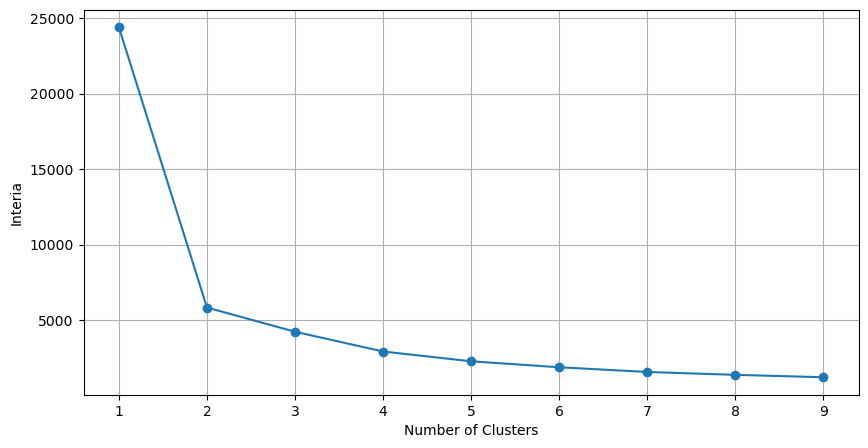

In [26]:
optimise_k_means(df[['RHOB_T', 'NPHI_T']], 10)

In [27]:
# APPLYING K MEANS

kmeans = KMeans(n_clusters=3)

kmeans.fit(df[['NPHI_T', 'RHOB_T']])

df['kmeans_3'] = kmeans.labels_

df

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,NPHI_T,GR_T,PEF_T,DTC_T,kmeans_3
DEPTH_MD,,,,,,,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,-1.491843,2.523654,-0.179292,-1.255364,0.869531,0
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,-1.387067,2.770744,-0.010859,-1.247886,0.690042,0
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,-1.320646,2.524300,0.028875,-1.247450,0.554350,0
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,-1.274390,2.068584,-0.008126,-1.261572,0.585297,0
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,-1.335919,1.617342,-0.092056,-1.325067,0.752808,0
...,...,...,...,...,...,...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564,1.265151,-0.524699,0.979338,0.433103,-1.149449,2
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599,1.222550,-0.456081,0.921870,0.433103,-1.158891,2
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836,1.110101,-0.356250,1.032560,0.433103,-1.105910,2


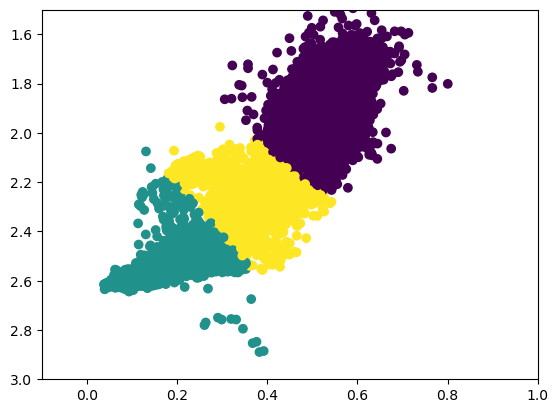

In [30]:
# PLOTTING RESULTS

plt.scatter(x=df['NPHI'], y=df['RHOB'], c=df['kmeans_3'])
plt.xlim(-0.1, 1)
plt.ylim(3, 1.5)
plt.show()

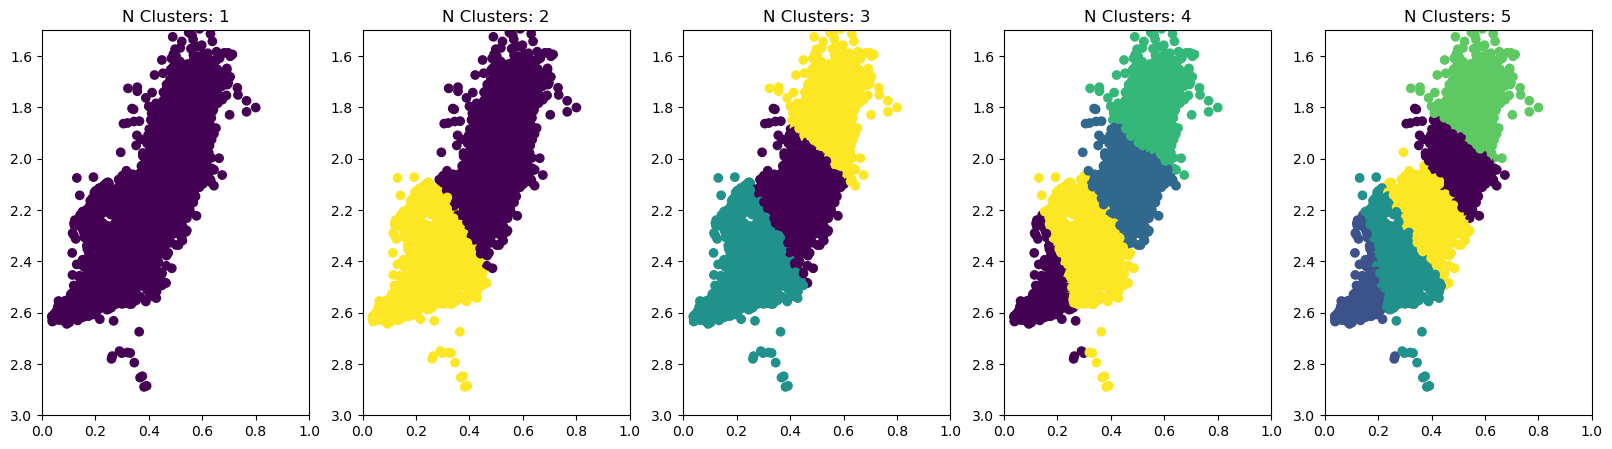

In [35]:
# DIFFERENT AMOUNT OF MEANS VS OUTPUT

for k in range(1, 6):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df[['RHOB_T', 'NPHI_T']])
    df[f'KMeans_{k}'] = kmeans.labels_

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=df['NPHI'], y=df['RHOB'], c=df[f'KMeans_{i}'])
    ax.set_ylim(3,1.5)
    ax.set_xlim(0,1)
    ax.set_title(f'N Clusters: {i}')